In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def generate_complex_signal(num_sample, k0):
    '''
    generate a complex signal
    
    num_sample : 信号的个数，即公式中的N
    k0 : 周期个数
    
    returns
    x : 复正弦信号
    '''
    
    n = np.arange(num_sample)
    x = np.exp(1j*2*np.pi*k0*n/num_sample)
    
    return x

## 线性性质
线性性质：两个函数之和的傅里叶变换等于各自变换之和，反之亦然

![Linearity](.\linearity.png "Linearity")

D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


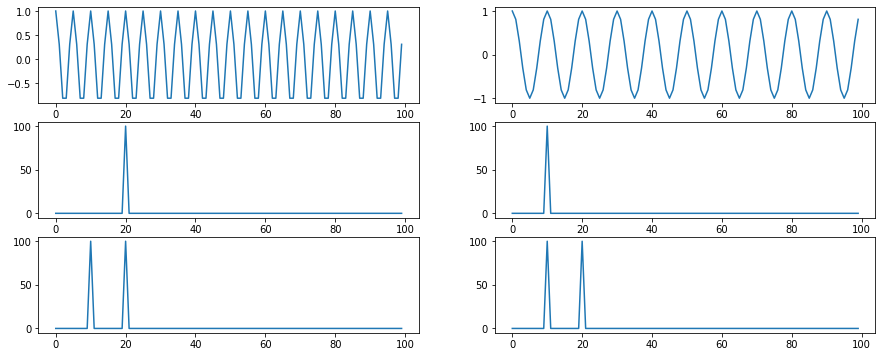

In [3]:
num_sample = 100
k0 = 20
x1 = generate_complex_signal(num_sample, k0)

num_sample = 100
k0 = 10
x2 = generate_complex_signal(num_sample, k0)

X1 = fft(x1)
X2 = fft(x2)
mX1 = np.abs(X1)
mX2 = np.abs(X2)

x12 = x1 + x2;  # adding two signal
X12 = fft(x12)
mX12 = np.abs(X12)


# plot the results
plt.figure(figsize=(15,6))

plt.subplot(321)
plt.plot(x1)
plt.subplot(322)
plt.plot(x2)

plt.subplot(323)
plt.plot(mX1)
plt.subplot(324)
plt.plot(mX2)

plt.subplot(325)
plt.plot(mX1 + mX2)
plt.subplot(326)
plt.plot(mX12)

plt.show()

## 平移性质
在时域上对信号进行平移，那么等价于在频域的复平面上旋转一个角度

相反的，频域的复平面上旋转一个角度，等价于时域上的平移

可以证明平移只对DFT的相位有影响，并不会改变DFT的幅度

![shift](.\shift.png "shift")

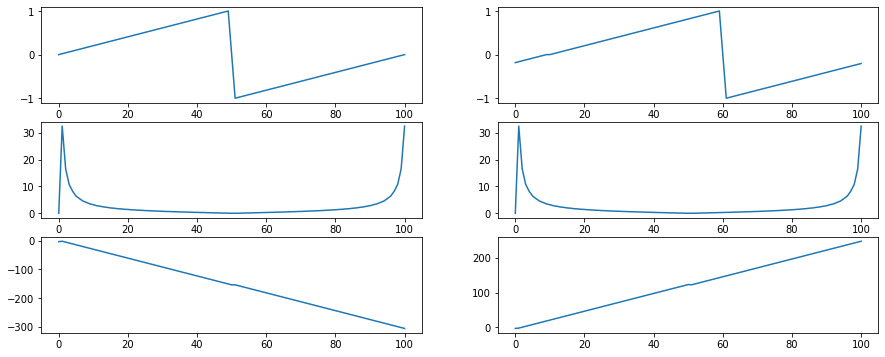

In [6]:
x1 = np.linspace(0, 1.0, 50)
x1 = np.append(x1,0)
x1 = np.append(x1,np.linspace(-1.0, 0, 50))

shifted_x = np.roll(x1, 10) # shift signal

X1 = fft(x1)
shiftedX = fft(shifted_x)

mX1 = np.abs(X1)
pX1 = np.angle(X1)
pX1 = np.unwrap(pX1)

mshiftedX = np.abs(shiftedX)
pshiftedX = np.angle(shiftedX)
pshiftedX = np.unwrap(pshiftedX)

# plot the results
plt.figure(figsize=(15,6))

plt.subplot(321)
plt.plot(x1)
plt.subplot(322)
plt.plot(shifted_x)

plt.subplot(323)
plt.plot(mX1)
plt.subplot(324)
plt.plot(mshiftedX)

plt.subplot(325)
plt.plot(pX1)
plt.subplot(326)
plt.plot(pshiftedX)

plt.show()

## 对称性质
![symmetry](.\symmetry1.png "symmetry")
![symmetry](.\symmetry2.png "symmetry")
![symmetry](.\symmetry3.png "symmetry")

## 卷积性质
在时域上的卷积操作，可以转换为两个信号傅里叶变换后的点乘操作

相反的，傅里叶变换后的点乘，在时域上表现为卷积

![convolution](.\convolution1.png "convolution")

![convolution](.\convolution2.png "convolution")

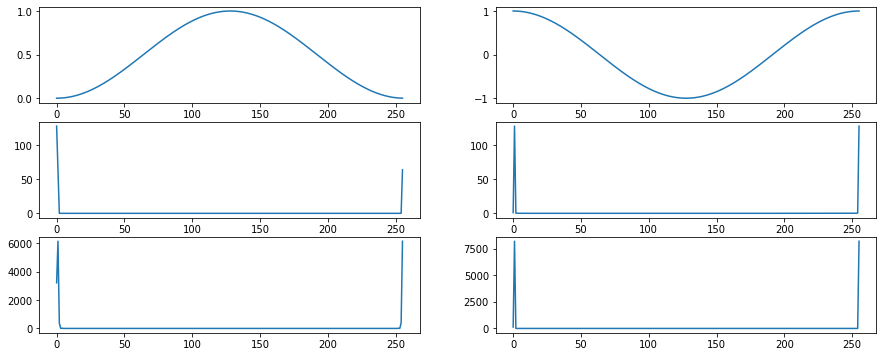

In [7]:
from scipy.signal import get_window

x1 = get_window('hanning', 256)
x2 = np.cos( np.linspace(0, 2*np.pi, 256) )
conv_x = np.convolve(x1, x2, 'same')

X1 = fft(x1)
X2 = fft(x2)
CX = fft(conv_x)

plt.figure(figsize=(15,6))

plt.subplot(321)
plt.plot(x1)
plt.subplot(322)
plt.plot(x2)

plt.subplot(323)
plt.plot(np.abs(X1))
plt.subplot(324)
plt.plot(np.abs(X2))

plt.subplot(325)
plt.plot(np.abs(CX))
plt.subplot(326)
plt.plot(np.abs(X1*X2))


plt.show()